<a href="https://colab.research.google.com/github/matheusmvl01/Covid-19/blob/main/Panomara_do_COVID_19_no_Brasil_e_no_mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

O dataset `owid-covid-data.csv` mantido pelo Our World in Data fornece dados globais detalhados sobre a pandemia de COVID-19, incluindo casos, mortes, vacinação, testes e outros indicadores relevantes. Organizado por data e país, ele permite análises temporais e regionais, com métricas ajustadas pela população, como casos e mortes por milhão. É uma fonte abrangente e bem estruturada para explorar a evolução da pandemia e avaliar respostas globais.

Analisar uma doença nova, como a COVID-19, apresenta desafios significativos devido à falta de dados históricos, evolução rápida do conhecimento científico e inconsistências nos sistemas de coleta e reporte de informações. Há frequentemente conflitos entre os dados divulgados por governos federal, estaduais e fontes não oficiais, decorrentes de diferenças metodológicas, atrasos na atualização e interesses políticos. Essas divergências podem dificultar a análise precisa, gerar desconfiança pública e comprometer a eficácia da análise de dados.

### Dicionário de Variáveis

Devido a grande quantidade de variaveis fiz um resumo das variaveis mais importantes do Dataset.

1. **iso_code**: Código ISO 3166-1 alfa-3 representando países ou regiões.
2. **location**: Nome do país ou região observada.
3. **date**: Data de registro das informações.
4. **total_cases**: Número total de casos confirmados.
5. **new_cases**: Novos casos confirmados no dia.
6. **total_deaths**: Número total de mortes registradas.
7. **new_deaths**: Novas mortes registradas no dia.
8. **total_cases_per_million**: Total de casos por milhão de habitantes.
9. **new_cases_per_million**: Novos casos por milhão de habitantes.
10. **total_deaths_per_million**: Total de mortes por milhão de habitantes.
11. **new_deaths_per_million**: Novas mortes por milhão de habitantes.
12. **total_tests**: Total de testes realizados.
13. **new_tests**: Número de novos testes realizados.
14. **total_tests_per_thousand**: Total de testes por mil habitantes.
15. **new_tests_per_thousand**: Novos testes realizados por mil habitantes.
16. **tests_units**: Unidade de medida usada para reportar testes (e.g., pessoas ou amostras).
17. **population**: População total do país ou região.
18. **population_density**: Densidade populacional (habitantes por km²).
19. **median_age**: Idade mediana da população.
20. **gdp_per_capita**: Produto Interno Bruto (PIB) per capita.
21. **life_expectancy**: Expectativa de vida média.
22. **human_development_index (HDI)**: Índice de Desenvolvimento Humano.


### Importando os dados do COVID-19


In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# importar o dataset COVID-19 para um Data Frame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-data.csv')

## Análise Exploratória dos Dados

Na fase de Análise Exploratória de Dados deste dataset sobre a COVID-19, o objetivo será examinar e compreender as informações relacionadas à pandemia em diferentes países e regiões. Serão analisadas variáveis como casos confirmados, mortes, testes realizados e vacinação. A EDA incluirá a verificação da estrutura dos dados, a análise de estatísticas descritivas e a visualização das relações entre variáveis, como a evolução dos casos ao longo do tempo.

### Análise Exploratória Inicial

#### 5 primeiras entradas

In [3]:
#verificando as 5 primeiras entradas do dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


#### Tamanho do Dataframe

In [4]:
# tamanho do dataframe
df.shape

print('O Dataframe contém', df.shape[0],'linhas e', df.shape[1],'colunas')

O Dataframe contém 429435 linhas e 67 colunas


#### Nome das colunas

In [5]:
#Extraindo e imprimindo o nome das colunas

print('O nome das colunas do Dataframe são:')
for i in df.columns:
  print(i)

O nome das colunas do Dataframe são:
iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vaccinated_smoothed
new_

#### Tipos de variáveis

In [6]:
#Verificando o tipo das variaveis

df.dtypes

,0
iso_code,object
continent,object
location,object
date,object
total_cases,float64
...,...
population,int64
excess_mortality_cumulative_absolute,float64
excess_mortality_cumulative,float64
excess_mortality,float64


#### Valores ausentes

In [7]:
# Verificando os valores ausentes das colunas
#pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending = True)

,0
iso_code,0
population,0
location,0
date,0
total_cases,17631
...,...
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality_cumulative_per_million,416024
weekly_icu_admissions_per_million,418442


#### Porcentagem de valores ausentes

In [8]:
# verificando a porcentagem dos valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=True)

,0
iso_code,0.000000
population,0.000000
location,0.000000
date,0.000000
total_cases,0.041056
...,...
excess_mortality_cumulative_absolute,0.968771
excess_mortality_cumulative,0.968771
excess_mortality_cumulative_per_million,0.968771
weekly_icu_admissions_per_million,0.974401


#### Coluna date para datetime

In [9]:
# Transformando a coluna date para datetime
df.date = pd.to_datetime(df.date)

print(df.dtypes.date)

datetime64[ns]


#### Número de casos

In [10]:
df.date.tail()

# eliminando os valores ausentes das colunas total_cases e total_death
df.dropna(subset=['total_cases','total_deaths'], inplace = True)

# Identificando o número de casos
df.loc[df.date == "2024-08-04"].sort_values(by="total_cases", ascending = False).head(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
424402,OWID_WRL,NaN,World,2024-08-04,775866783.0,47169.0,6738.43,7057132.0,815.0,116.43,...,34.64,60.13,2.70,72.58,0.74,7975105024,NaN,NaN,NaN,NaN
166872,OWID_HIC,NaN,High-income countries,2024-08-04,429044049.0,32293.0,4613.29,2997359.0,786.0,112.29,...,NaN,NaN,NaN,NaN,NaN,1250514600,NaN,NaN,NaN,NaN
21765,OWID_ASI,NaN,Asia,2024-08-04,301499099.0,4515.0,645.00,1637249.0,17.0,2.43,...,NaN,NaN,NaN,NaN,NaN,4721383370,NaN,NaN,NaN,NaN
120242,OWID_EUR,NaN,Europe,2024-08-04,252916868.0,39047.0,5578.14,2102483.0,162.0,23.14,...,NaN,NaN,NaN,NaN,NaN,744807803,NaN,NaN,NaN,NaN
409811,OWID_UMC,NaN,Upper-middle-income countries,2024-08-04,251753518.0,14277.0,2039.57,2824452.0,29.0,4.14,...,NaN,NaN,NaN,NaN,NaN,2525921300,NaN,NaN,NaN,NaN
123276,OWID_EUN,NaN,European Union (27),2024-08-04,185822587.0,25642.0,3663.14,1262988.0,150.0,21.43,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
278858,OWID_NAM,NaN,North America,2024-08-04,124492666.0,454.0,64.86,1671178.0,619.0,88.43,...,NaN,NaN,NaN,NaN,NaN,600323657,NaN,NaN,NaN,NaN
405124,USA,North America,United States,2024-08-04,103436829.0,NaN,NaN,1193165.0,619.0,88.43,...,24.60,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
75343,CHN,Asia,China,2024-08-04,99373219.0,2087.0,298.14,122304.0,15.0,2.14,...,48.40,NaN,4.34,76.91,0.76,1425887360,NaN,NaN,NaN,NaN
222800,OWID_LMC,NaN,Lower-middle-income countries,2024-08-04,91954400.0,598.0,85.43,1188026.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,3432097300,NaN,NaN,NaN,NaN


In [20]:
# porcentagem de do numero de casos em relação a população de cada pais
df.loc[(df.date == "2024-08-04") & (df.iso_code == 'USA')].total_cases / df.loc[(df.date == "2024-08-04") & (df.iso_code == 'USA')].population
df.loc[(df.date == "2024-08-04") & (df.iso_code == 'CHN')].total_cases / df.loc[(df.date == "2024-08-04") & (df.iso_code == 'CHN')].population
df.loc[(df.date == "2024-08-04") & (df.iso_code == 'IND')].total_cases / df.loc[(df.date == "2024-08-04") & (df.iso_code == 'IND')].population
df.loc[(df.date == "2024-08-04") & (df.iso_code == 'FRA')].total_cases / df.loc[(df.date == "2024-08-04") & (df.iso_code == 'FRA')].population
df.loc[(df.date == "2024-08-04") & (df.iso_code == 'DEU')].total_cases / df.loc[(df.date == "2024-08-04") & (df.iso_code == 'DEU')].population
df.loc[(df.date == "2024-08-04") & (df.iso_code == 'BRA')].total_cases / df.loc[(df.date == "2024-08-04") & (df.iso_code == 'BRA')].population

,0
51907,0.17422


Os 6 países que com os maiores números de casos confirmados de COVID-19 até a data de hoje (06-12-2024) foram:
  * Estados Unidos - 103436829 casos confirmados.
  * China - 99373219 casos confirmados.
  * India - 45041748 casos confirmados.
  * França - 38997490 casos confirmados.
  * Alemanha - 38437756 casos confirmados.
  * Brasil - 37511921 casos confirmados.

Se levarmos em consideração o número de casos confirmados com a população desses paises teremos a proporção de:
  * Estados Unidos - 30,57% da população foi diagnosticada com COVID-19.
  * China - 06,56% da população da foi diagnosticada com COVID-19.
  * India - 03,17% da população da foi diagnosticada com COVID-19.
  * França - 57,50% da população da foi diagnosticada com COVID-19.
  * Alemanha - 46,10% da população da foi diagnosticada com COVID-19.
  * Brasil - 17,42% da população da foi diagnosticada com COVID-19.

#### Número de mortes

In [23]:
# Identificando o número de mortes
df.loc[df.date == "2024-08-04"].sort_values(by="total_deaths", ascending = False).head(16)

# Porcentagem sobre o número de mortes
(df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'USA')].total_deaths / df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'USA')].population)*100
(df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'BRA')].total_deaths / df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'BRA')].population)*100
(df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'IND')].total_deaths / df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'IND')].population)*100
(df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'RUS')].total_deaths / df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'RUS')].population)*100
(df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'MEX')].total_deaths / df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'MEX')].population)*100
(df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'GBR')].total_deaths / df.loc[(df.date == '2024-08-04') &  (df.iso_code == 'GBR')].population)*100

,0
403450,0.343824


Os 6 países com os maiores números de mortes confirmadas de COVID-19 até o dia desse estudo (06/12/2024) são:
  * Estados Unidos - 1193165 de mortes por COVID-19
  * Brasil - 702116 de mortes por COVID-19
  * Índia - 533623 de mortes por COVID-19
  * Rússia - 403188 de mortes por COVID-19
  * México - 334551 de mortes por COVID-19
  * Grã - Bretanha- 232112 de mortes por COVID-19

Se levarmos em consideração o número de mortes em proporção da população desses países teremos:
  * Estados Unidos - 0.35% da população morreu por COVID-19
  * Brasil - 0.32% da população morreu por COVID-19
  * Índia - 0.03% da população morreu por COVID-19
  * Rússia - 0.27% da população morreu por COVID-19
  * México - 0.26% da população morreu por COVID-19
  * Grã - Bretanha - 0.34% da população morreu por COVID-19

Quando levamos em consideração o número de mortes em relação a população total do país, podemos ver que temos países com um número total de mortes elevado, porém com taxa de mortalidade baixa, como por exemplo a Índia que é o 3º país com maior numero de mortes mas com taxa de mortalidade de apenas 0.03% da população.

#### Gráfico de mortalidade

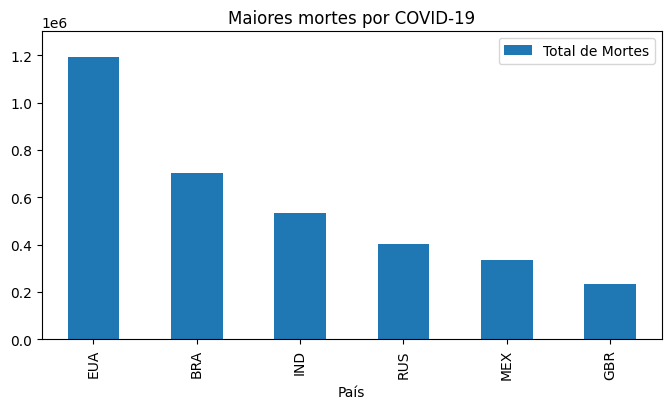

In [24]:
# Separando os 6 países com maior número de mortes
df.loc[df.date == '2024-08-04', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:16]
top_deaths = {'EUA' : 1193165, 'BRA' : 702116 , 'IND' : 533623 , 'RUS' : 403188 , 'MEX' : 334551 , 'GBR' : 232112 }
df_top_deaths = pd.DataFrame(list(top_deaths.items()), columns=['País', 'Total de Mortes'])
df_top_deaths

# criando um gráfico de barras referente a mortalidade de cada país
fig, ax = plt.subplots(figsize = (8,4))

df_top_deaths.plot(x='País' , y = 'Total de Mortes', kind = 'bar' , ax = ax)

ax.set_title('Maiores mortes por COVID-19')
ax.set_ylim(0, 1300000)
ax.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])

plt.show()

O gráfico ilustra claramente as diferenças no impacto da pandemia entre essas regiões, refletindo fatores como população, medidas de controle e infraestrutura de saúde. A escala vertical (eixo Y) vai de 0 a 1,3 milhão, destacando as disparidades entre os países.

#### Gráfico de mortalidade mundial

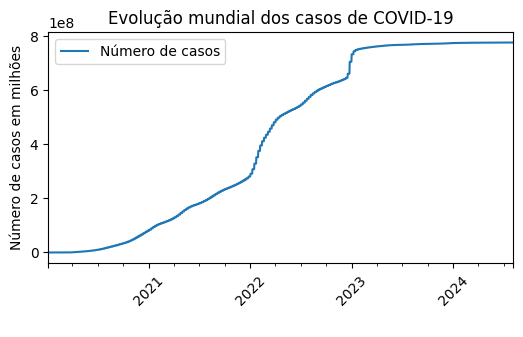

In [14]:
# criando gráfico de mortalidade mundial
df_cases_world = df.loc[df.iso_code == 'OWID_WRL']

fig, ax = plt.subplots(figsize = (6,3))

df_cases_world.plot(x = 'date' , y = 'total_cases', label = 'Número de casos' , ax=ax)

ax.set_title('Evolução mundial dos casos de COVID-19')
ax.set_ylabel('Número de casos em milhões')
ax.set_xlabel(' ')
ax.tick_params(axis='x', rotation=45)


plt.show()

A linha curva indica o aumento constante de casos ao longo do tempo, refletindo o impacto crescente da pandemia no mundo. O gráfico não apenas evidencia a evolução global, mas também destaca o momento em que o número de casos começou a aumentar de forma mais acentuada. Este padrão é típico de pandemias, onde as infecções aumentam rapidamente após uma fase inicial.

Este gráfico oferece uma visão clara do impacto global do COVID-19, permitindo observar tendências e analisar como a pandemia se espalhou em escala mundial ao longo do tempo.

### Análise Exploratória para o Brasil


#### Primeiro caso de COVID-19

In [15]:
# criando dataframe com os dados do brasil
df_brasil = df.loc[df.iso_code == 'BRA']

# primeiro caso registrado
df_brasil.loc[df_brasil.new_cases != 0][0:2]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50290,BRA,South America,Brazil,2020-03-01,1.0,1.0,0.14,0.0,0.0,0.0,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50297,BRA,South America,Brazil,2020-03-08,13.0,12.0,1.71,0.0,0.0,0.0,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN


O primeiro caso de COVID-19 registrado no brasil foi em 01/03/2020.

#### Primeira morte por COVID-19

In [16]:
df_brasil.loc[df_brasil.new_deaths > 0][0:1]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50311,BRA,South America,Brazil,2020-03-22,904.0,820.0,117.14,11.0,11.0,1.57,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN


A primeira morte por COVID-19 resgistrada foi em 22/03/2020, 21 dias após o primeiro caso registrado.

#### Gráfico no número de casos e mortes no Brasil

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12,8), dpi = 1080)

# Gráfico 1: Casos totais (escala linear)
ax[0, 0].plot(df_brasil['date'], df_brasil['total_cases'], color='blue')
ax[0, 0].set_title('Casos Totais - Escala Linear')
ax[0, 0].set_ylabel('Número de Casos')
ax[0, 0].set_xlabel('Data')
ax[0, 0].tick_params(axis='x', rotation=45)


# Gráfico 2: Casos totais (escala logarítmica)
ax[0, 1].plot(df_brasil['date'], df_brasil['total_cases'], color='blue')
ax[0, 1].set_yscale('log')
ax[0, 1].set_title('Casos Totais - Escala Logarítmica')
ax[0, 1].set_ylabel('Número de Casos (Log)')
ax[0, 1].set_xlabel('Data')
ax[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Mortes totais (escala linear)
ax[1, 0].plot(df_brasil['date'], df_brasil['total_deaths'], color='red')
ax[1, 0].set_title('Mortes Totais - Escala Linear')
ax[1, 0].set_ylabel('Número de Mortes')
ax[1, 0].set_xlabel('Data')
ax[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Mortes totais (escala logarítmica)
ax[1, 1].plot(df_brasil['date'], df_brasil['total_deaths'], color='red')
ax[1, 1].set_yscale('log')
ax[1, 1].set_title('Mortes Totais - Escala Logarítmica')
ax[1, 1].set_ylabel('Número de Mortes (Log)')
ax[1, 1].set_xlabel('Data')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Conclusão

Este projeto analisou o impacto da pandemia de COVID-19 no Brasil e no mundo, explorando dados abrangentes sobre casos confirmados e mortes. A evolução temporal revelou o rápido crescimento inicial de casos e mortes. Países como Estados Unidos, Brasil e Índia lideraram em número de casos, enquanto ajustes populacionais mostraram impactos mais significativos em nações como França e Alemanha. No Brasil, o primeiro caso foi registrado em março de 2020, seguido pela primeira morte 21 dias depois, evidenciando o desafio enfrentado na gestão da saúde pública. A análise revelou que 17,42% da população brasileira foi infectada, com uma taxa de mortalidade de 0,32%. Utilizando escalas lineares e logarítmicas, o estudo identificou padrões de crescimento exponencial e desaceleração, permitindo insights sobre o comportamento da pandemia. Além disso, foram observadas disparidades significativas no impacto da pandemia, dependendo da infraestrutura de saúde e políticas locais, como no caso da Índia, que teve alta mortalidade em números absolutos, mas uma taxa proporcionalmente baixa devido à sua vasta população. Esta análise reforça a importância de sistemas de saúde robustos, políticas públicas eficazes e acesso equitativo a tratamentos, destacando o valor da ciência de dados para enfrentar crises globais e orientar ações futuras.






